# Data exploration and visualisation

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import train_test_split

In [194]:
# READ THE DATA in as pandas table - categories are character strings
artworks_character = pd.read_table("beautified_boxes.txt", index_col="Column1")
artworks_character.index.name = None
artworks_character

,Artwork-Id,type,district,environment,countArtists,experience,replaced,content,userRating,approval
0,32048698,painting,Treptow-Kopenick,main street,2,first time,nothing,animals or plants,4.0,1
1,39800694,painting,Treptow-Kopenick,park,3,beginner,poster,political,2.0,0
2,80318972,graffiti,Treptow-Kopenick,public spot,3,beginner,stickers and tags,scenery,4.0,0
3,74478002,graffiti,Treptow-Kopenick,main street,4,first time,recent graffiti,cartoon or comical,4.0,0
4,71449602,painting,Steglitz-Zehlendorf,side street,3,beginner,poster,cartoon or comical,NaN,0
...,...,...,...,...,...,...,...,...,...,...
745,68311402,painting,Tempelhof-Schoneberg,side street,2,first time,weathered graffiti,political,3.0,1
746,22390811,painting,Mitte,park,2,beginner,weathered graffiti,cartoon or comical,5.0,1
747,19230282,painting,Friedrichshain-Kreuzberg,park,1,advanced,weathered graffiti,people,5.0,1
748,29644044,painting,Treptow-Kopenick,side street,2,advanced,stickers and tags,scenery,3.0,1


In [46]:
# READ THE DATA - categories are replaced by numeric values
# numeric categories are needed for some plots
artworks_numeric = pd.read_table("beautified_boxes_numeric.txt", index_col="Unnamed: 0").fillna(0)

       countArtists  userRating    approval
count    750.000000  674.000000  750.000000
mean       2.462667    3.219585    0.617333
std        1.089122    1.205178    0.486362
min        1.000000    1.000000    0.000000
25%        2.000000    2.000000    0.000000
50%        2.000000    3.000000    1.000000
75%        3.000000    4.000000    1.000000
max        5.000000    5.000000    1.000000 

In total, 1847 people have applied for 750 beautifications.
The average number of artists per artwork was 2.46 .
Of all applications, 0.899 % had a user rating and 61.73 % have been approved by the authorities.



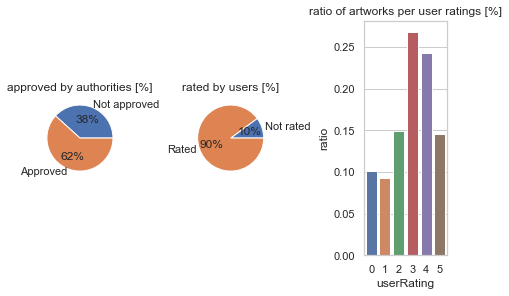

In [269]:
# SUMMARY STATISTICS - NUMERIC VALUES ("countArtists", "userRating", "approval")

# use the describe() function to get a set of preselected summary statistics
# only applied to the naturally numeric values (like user rating), but not to the categories which needed to be transformed to numeric categories (like type)
summary = artworks_character.loc[:, ["countArtists", "userRating", "approval"]].describe()
print(summary, "\n")

# print some additional summary statistics and interpretations
print("In total,", artworks_character["countArtists"].sum(), "people have applied for", artworks_character["Artwork-Id"].count(), "beautifications.")
print("The average number of artists per artwork was", summary.loc["mean", "countArtists"].round(2), ".")
print("Of all applications,", (summary.loc["count", "userRating"] / artworks_character["Artwork-Id"].count()).round(3), "% had a user rating and", (summary.loc["mean", "approval"] * 100).round(2), "% have been approved by the authorities.")

# print: 1) pie chart of ratio of artworks approved by authorities, 
#        2) pie chart of ratio of artworks rated by users,
#        3) bar plot of ratio of artworks per possible case of user rating (1, 2, 3, 4, 5). A missing user value is represent by the value 0

# extract data to be plotted to a new data frame each
count_ratings = pd.DataFrame((artworks_numeric.groupby(["userRating"])["userRating"].count()/750)).rename(columns={"userRating": "ratio"}).reset_index()
ratio_approval = pd.DataFrame(artworks_numeric.groupby(["approval"])["approval"].count()/750).rename(columns={"approval": "ratio"})
ratio_rating = pd.DataFrame({"ratio": [(summary.loc["count", "approval"] - summary.loc["count", "userRating"]).round(2), summary.loc["count", "userRating"].round(2)]})

# set color theme for seaborn
sns.set_theme(style="whitegrid")

# make a grid for three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, constrained_layout=True)
# set titles of the three subplots
ax1.set_title("approved by authorities [%]")
ax2.set_title("rated by users [%]")
ax3.set_title("ratio of artworks per user ratings [%]")
# plot the three plots
ax1.pie(ratio_approval["ratio"], labels=["Not approved", "Approved"], autopct='%.0f%%')
ax2.pie(ratio_rating["ratio"], labels=["Not rated", "Rated"], autopct='%.0f%%')
sns.barplot(x="userRating", y="ratio", data=count_ratings, ax=ax3)

# since jupyter prints the last command, I added an empty print in order not to optically disrupt the data visualissations.
print()

SUMMARY STATISTICS - NON NUMERIC VALUES ("type", "district", "environment", "experience", "replaced", "content")

In [ ]:
# TYPE
# pie or bar chart



In [ ]:
# DISTRICT
# pie or bar chart

In [ ]:
# ENVIRONMENT

In [ ]:
# EXPERIENCE

In [ ]:
# REPLACED

In [ ]:
# CONTENT

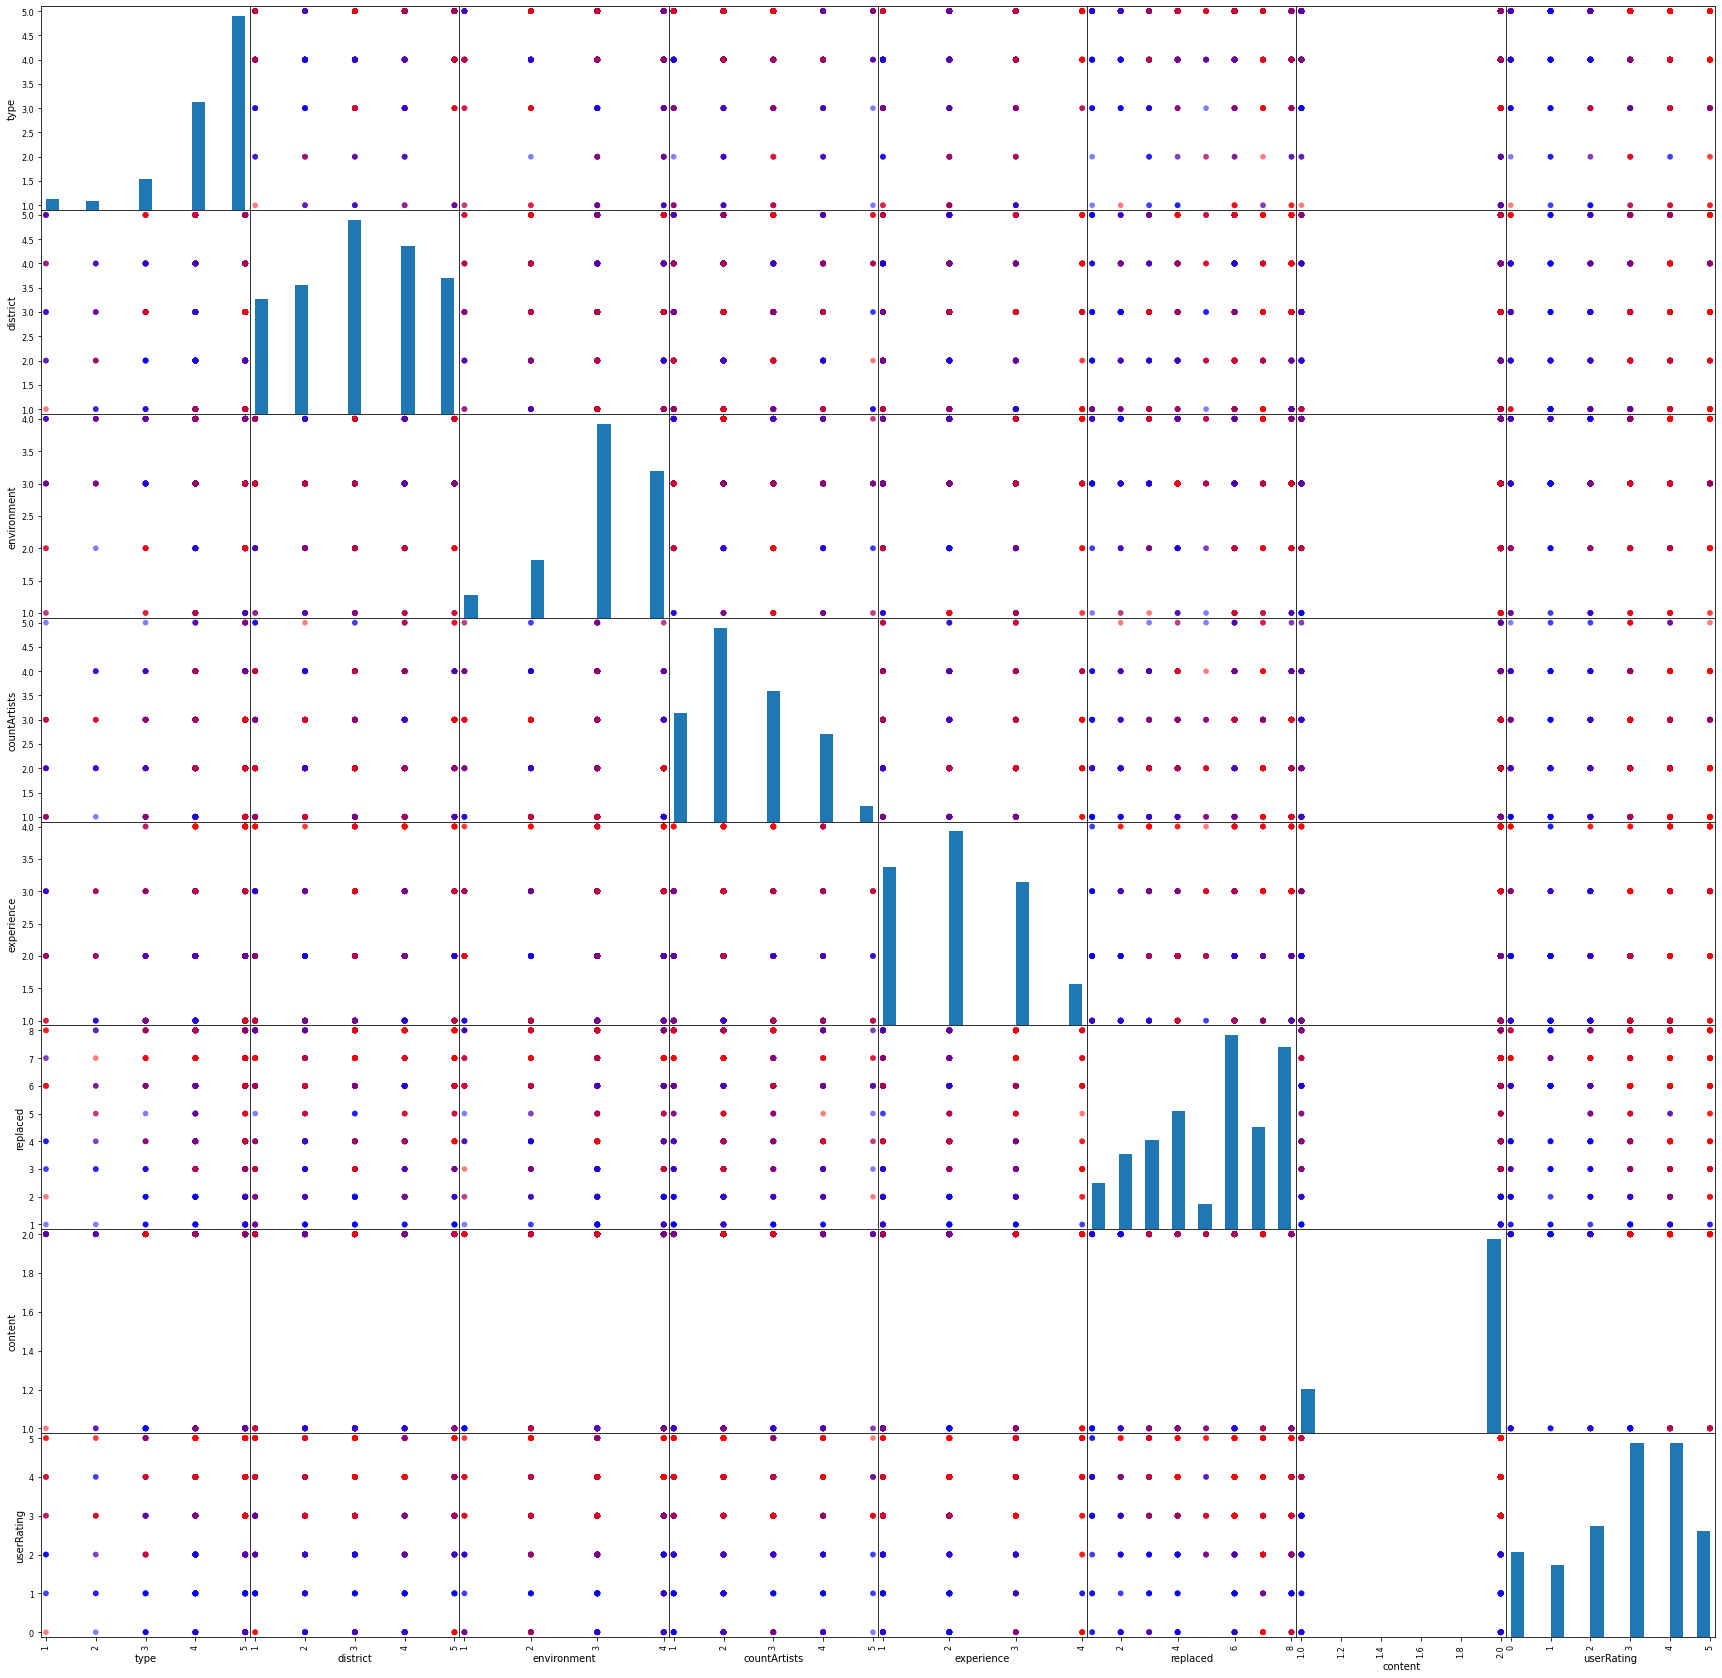

In [41]:
# SCATTER PLOT MATRIX
# SET FEATURES AND LABEL, THEN DO TRAIN-TEST-SPLIT

# set features and label
# features (X): "type", "district", "environment", "countArtists", "experience", "replaced", "content", "userRating"
# label (y): "approval"
# do not use for classification: "Artwork_Id"
X = artworks_numeric[["type", "district", "environment", "countArtists", "experience", "replaced", "content", "userRating"]]
y = artworks_numeric["approval"]

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y)

#get color map
cmap = cm.get_cmap("bwr")
# plot the scatter plot matrix
scatter = pd.plotting.scatter_matrix(X_train, marker=".",  s=130, hist_kwds={'bins':15}, figsize=(30, 30), cmap=cmap, c=y_train)

# LEGEND:
# data points are colored according to probability/ratio of approval
# color scale is continuous from blue (not approved) to red (approved)
# the "bluer" a data point is, the less likely was the approval and vice versa

# data points are distinctly separated from another
# this is due to the nature of the categories: numerical and equidistant, only natural numbers
# most data points are either blue or red. Those are the cases in which approval was consistent and a classifier is likely to predict correctly
# some data points, however, are in between. Those are the cases in which approval was not consistent and which account for a major part of the inaccuracy of the classifier

# all in all, the data seems to allow usage of a knn or decision tree classifier